# Step 1: Importing Libraries and Reading Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
leads_data = pd.read_csv("Leads.csv")
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##### Getting idea about number of rows and columns:

In [3]:
leads_data.shape

(9240, 37)

##### Checking Data Types:

In [4]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

##### Reading Statistics:

In [5]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 2: Data Cleaning

##### Checking Missing Values:

In [6]:
round(100 * (leads_data.isnull().sum()/leads_data.shape[0]), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

We found that a lot of records contain the value "Select". It means the customer didn't select any option provided in the form. We can consider them as null values

##### Replacing "Select" with NAN:

In [7]:
leads_data = leads_data.replace('Select', np.nan)

##### Again checking Missing Value:

In [8]:
missing_value = round(100 * (leads_data.isnull().sum()/leads_data.shape[0]), 2).sort_values(ascending=False)
missing_value

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

##### Removing the columns which have missing value more than 30%:

In [9]:
leads_data = leads_data.loc[: , missing_value<=30]

##### Again checking Missing Values. Now, we have only 6 columns with missing values:

In [10]:
round(100 * (leads_data.isnull().sum()/leads_data.shape[0]), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Imputing Missing Values:

##### Imputing missing value in the column "What matters most to you in choosing a course" with `Mode` of it:

In [11]:
leads_data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [12]:
    leads_data['What matters most to you in choosing a course'] = leads_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

##### Imputing missing value in the column "What is your current occupation" with `Mode` of it:

In [13]:
leads_data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [14]:
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(np.nan, 'Unemployed')

##### Imputing missing value in the column "Country" with `Mode` of it:

In [15]:
leads_data['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [16]:
leads_data['Country'] = leads_data['Country'].replace(np.nan, 'India')

##### Cheching Missing Value now:

In [17]:
round(100 * (leads_data.isnull().sum()/leads_data.shape[0]), 2).sort_values(ascending=False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Last Notable Activity                            0.00
What is your current occupation                  0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Country                                          0.00
What matters most to you in choosing a course    0.00
A free copy of Mastering The Interview           0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

Now, we can see that Missing Values are very less. It's good to drop them.

##### Dropping Missing Values and checking:

In [18]:
leads_data = leads_data.dropna()

In [19]:
round(100 * (leads_data.isnull().sum()/leads_data.shape[0]), 2).sort_values(ascending=False)

Last Notable Activity                            0.0
What is your current occupation                  0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

Now, there is no Missing Value in the Dataset.

##### Checking shape of the data. Now, it is reduced after imputing Missing Values:

In [20]:
leads_data.shape

(9074, 27)

##### Checking number of Unique Values in each column:

In [21]:
leads_data.nunique()

Prospect ID                                      9074
Lead Number                                      9074
Lead Origin                                         4
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

##### Checking Unique Values in each columns:

In [22]:
for i in leads_data.columns:
    print('{}:\n\n {}\n'.format(i, leads_data[i].describe()))

Prospect ID:

 count                                     9074
unique                                    9074
top       479ae0e2-e74d-4ed7-b3a6-3247e8dcd4fc
freq                                         1
Name: Prospect ID, dtype: object

Lead Number:

 count      9074.000000
mean     617032.619352
std       23348.029512
min      579533.000000
25%      596406.000000
50%      615278.500000
75%      637176.500000
max      660737.000000
Name: Lead Number, dtype: float64

Lead Origin:

 count                        9074
unique                          4
top       Landing Page Submission
freq                         4885
Name: Lead Origin, dtype: object

Lead Source:

 count       9074
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

Do Not Email:

 count     9074
unique       2
top         No
freq      8358
Name: Do Not Email, dtype: object

Do Not Call:

 count     9074
unique       2
top         No
freq      9072
Name: Do Not Call, dtype: object

Convert

##### As per the above results calculated with unique values and describe function, we can remove those columns  which have only one value count. Also, we can remove those columns as well in which almost all the data is being presented by single value. Below are the colums:
- Magazine
- X Education Forums
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque

##### Removing above columns:

In [23]:
leads_data = leads_data.drop(columns=['Magazine','X Education Forums','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque', 'Country'])

##### Removing `Prospect ID` columns as `Lead Number` explains the same thing:

In [24]:
leads_data = leads_data.drop('Prospect ID', 1)

##### Checking Statistics of each column:

In [25]:
for i in leads_data.columns:
    print('{}:\n\n {}\n'.format(i, leads_data[i].describe()))

Lead Number:

 count      9074.000000
mean     617032.619352
std       23348.029512
min      579533.000000
25%      596406.000000
50%      615278.500000
75%      637176.500000
max      660737.000000
Name: Lead Number, dtype: float64

Lead Origin:

 count                        9074
unique                          4
top       Landing Page Submission
freq                         4885
Name: Lead Origin, dtype: object

Lead Source:

 count       9074
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

Do Not Email:

 count     9074
unique       2
top         No
freq      8358
Name: Do Not Email, dtype: object

Do Not Call:

 count     9074
unique       2
top         No
freq      9072
Name: Do Not Call, dtype: object

Converted:

 count    9074.000000
mean        0.378554
std         0.485053
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Converted, dtype: float64

TotalVisits:

 count    9074.0

#### We can remove those columns which have 'No' values greater than 99%.Since these columns do not give information in analysis. Below are the olumns:
- Do Not Email
- Do Not Call
- Search
- Newspaper Article
- Newspaper
- Digital Advertisement
- Through Recommendations
- What matters most to you in choosing a course

##### Removing above columns:

In [26]:
leads_data = leads_data.drop(columns=['Do Not Email','Do Not Call','Search','Newspaper Article','Newspaper','Digital Advertisement','Through Recommendations','What matters most to you in choosing a course'])

##### Checking shape of the data:

In [27]:
leads_data.shape

(9074, 11)

### Outlier Treatment:

##### Finding numerical columns:

In [28]:
num_vars = list(leads_data.columns[leads_data.dtypes != 'object'])
num_vars

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

##### Checking Outliers with percentiles:

In [29]:
leads_data[num_vars].describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.97, 0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000
97%,657384.240000,1.000000,11.000000,1655.000000,7.000000


##### Checking Outliers with Boxplot:

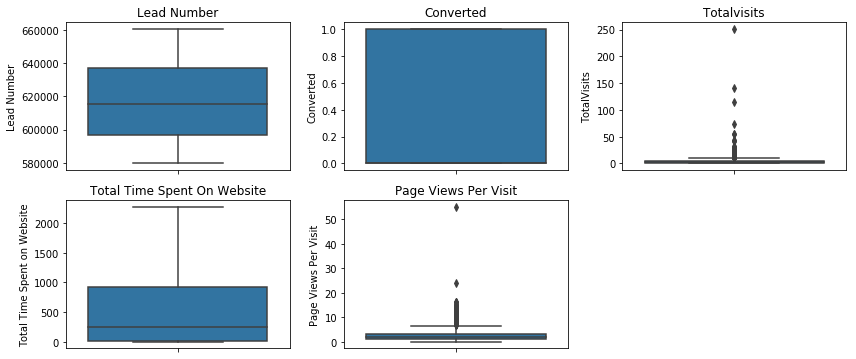

In [30]:
plt.figure(figsize=[12,10])
for i in range(0, len(num_vars)):
    plt.subplot(4,3,i+1)
    sns.boxplot(y=num_vars[i], data=leads_data)
    plt.title(num_vars[i].title())
    plt.tight_layout()

We can see that the columns `TotalVisits` and `Page Views Per Visit` have Outliers. Let's remove them.

##### Treating Outliers using IQR method:

In [31]:
Q1 = leads_data['TotalVisits'].quantile(0.25)
Q3 = leads_data['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads_data=leads_data.loc[(leads_data['TotalVisits'] >= Q1 - 1.5*IQR) & (leads_data['TotalVisits'] <= Q3 + 1.5*IQR)]

Q1 = leads_data['Page Views Per Visit'].quantile(0.25)
Q3 = leads_data['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads_data=leads_data.loc[(leads_data['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads_data['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

# Step 3: Data Preparation

##### The column "A free copy of Mastering The Interview" is the only column with the values 'Yes' and 'No'. Let's conver them in the form of 1 and 0:

In [32]:
leads_data['A free copy of Mastering The Interview'] = leads_data['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

##### Creating Dummy Variables for other multi-level catagorical variables:

In [33]:
# Creating dummy variable for the variable 'Lead Origin':
lo = pd.get_dummies(leads_data['Lead Origin'],prefix='Lead Origin',drop_first=True)
leads_data = pd.concat([leads_data, lo],axis=1)

# Creating a dummy variable for the variable 'Lead Source'
ls = pd.get_dummies(leads_data['Lead Source'],prefix='Lead Source',drop_first=True)
leads_data = pd.concat([leads_data, ls],axis=1)  

# Creating a dummy variable for the variable 'Last Activity'
la = pd.get_dummies(leads_data['Last Activity'],prefix='Last Activity',drop_first=True)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data, la],axis=1)

# Creating a dummy variable for the variable 'LWhat is your current occupation'
wo = pd.get_dummies(leads_data['What is your current occupation'],prefix='What is your current occupation',drop_first=True)
leads_data = pd.concat([leads_data, wo],axis=1)

# Creating a dummy variable for the variable 'Last Notable Activity'
lna = pd.get_dummies(leads_data['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
leads_data = pd.concat([leads_data, lna],axis=1)

##### Dropping original columns after creation of dummies:

In [34]:
leads_data = leads_data.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Last Notable Activity'])

In [35]:
leads_data.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


##### Checking new shape of Data:

In [36]:
leads_data.shape

(8513, 65)

# Step 4: Train-Test Split

##### Assigning features to X and y variables:

In [37]:
X = leads_data.drop(['Lead Number','Converted'], axis=1)
y = leads_data['Converted']

In [38]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


##### Splitting the Data into Training and Test set:

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [40]:
X_train.shape

(5959, 63)

In [41]:
X_test.shape

(2554, 63)

# Step 5: Feature Scaling

##### Scaling continuous variables in the dataset:

In [42]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5123,-1.153092,-0.867873,-1.253080,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6322,-0.743258,0.108309,-0.648118,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3644,1.305912,-0.842280,0.561805,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3011,0.896078,-0.451076,0.259325,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8140,-0.743258,-0.767330,-0.648118,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Step 6: Data Visualization:

##### Correlation Matrix using Heatmap:

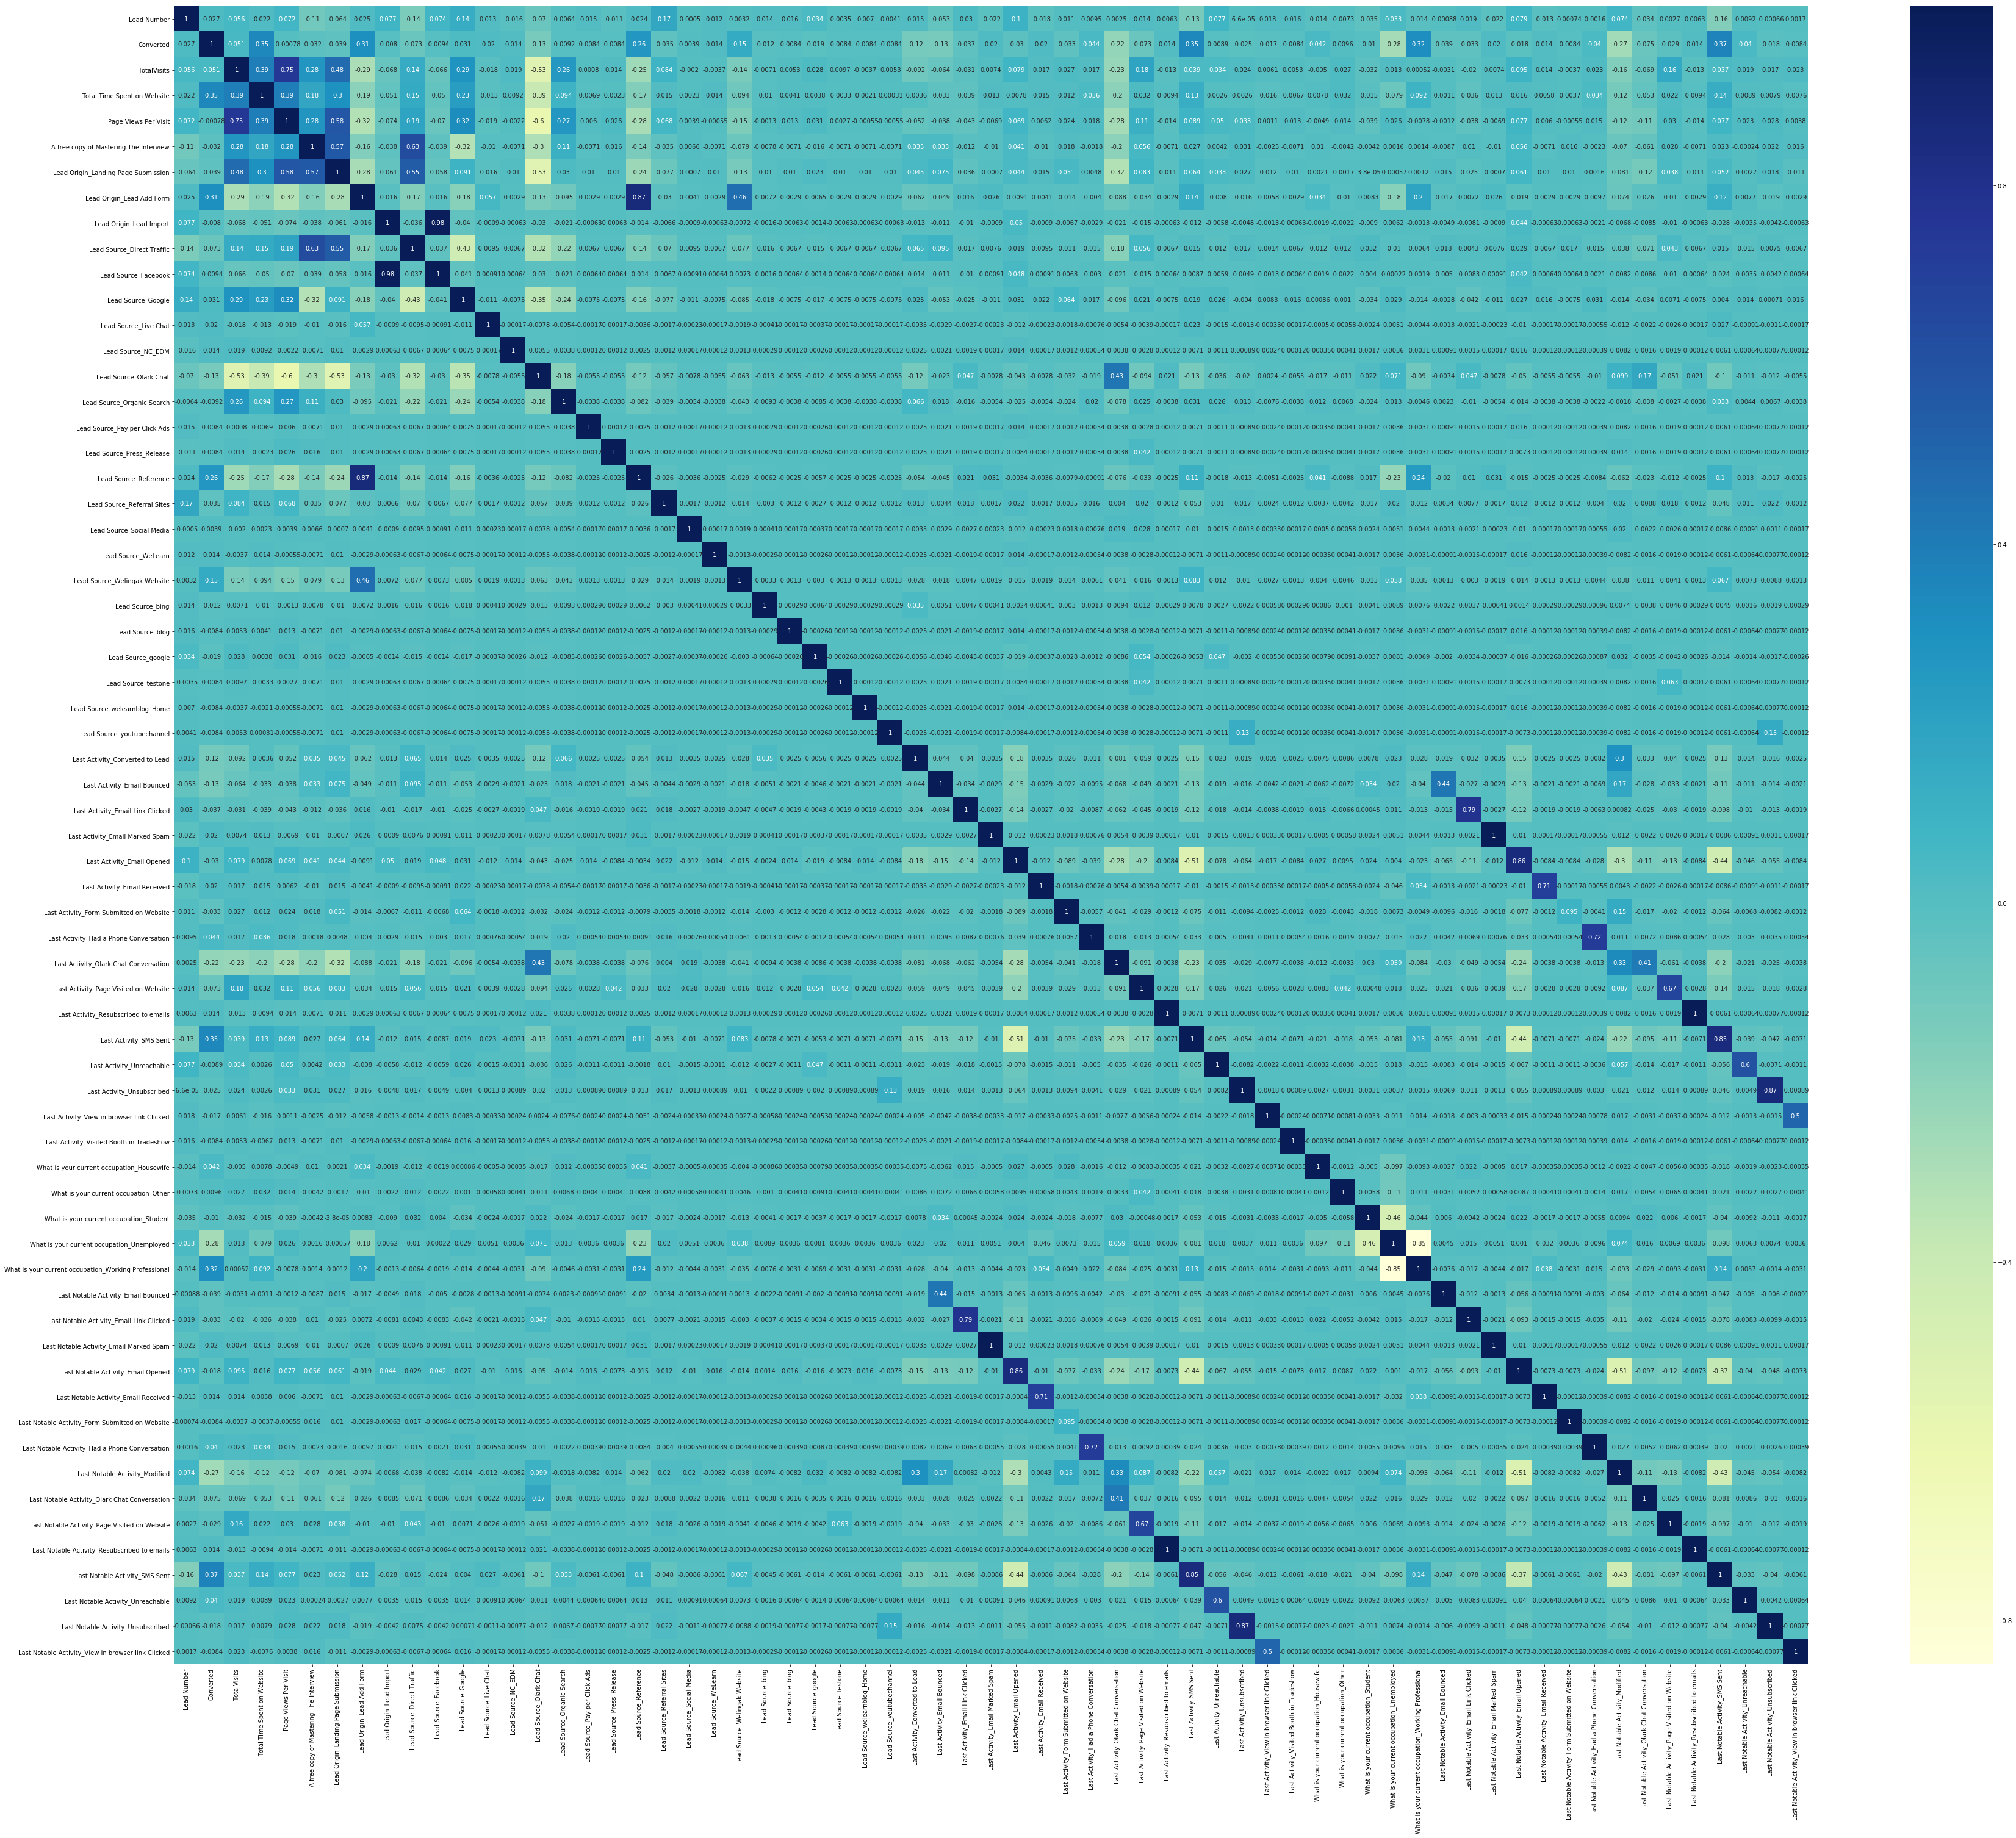

In [43]:
plt.figure(figsize = (60,50))
sns.heatmap(leads_data.corr(),annot = True, cmap='YlGnBu')
plt.show()

# Step 7: Feature Selection Using RFE

In [44]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [45]:
rfe.support_

array([False,  True, False, False, False,  True, False,  True, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
        True,  True, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False])

In [46]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('A free copy of Mastering The Interview', False, 38),
 ('Lead Origin_Landing Page Submission', False, 33),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 37),
 ('Lead Source_NC_EDM', False, 17),
 ('Lead Source_Olark Chat', False, 9),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 32),
 ('Lead Source_Press_Release', False, 45),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 8),
 ('Lead Source_WeLearn', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 40),
 ('Lead Source_blog', False, 18),
 ('Lead Source_google', False, 11),
 ('Lead Source_testone', False, 2

##### Columns supported by RFE:

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

##### Columns not supported by RFE:

In [48]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_Vi

# Step 8: Model Building:

### 1st Model:

In [49]:
X_train_sm = sm.add_constant(X_train[col])
logm_1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
logm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5943
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2483.3
Date:                Mon, 02 Mar 2020   Deviance:                       4966.5
Time:                        13:42:57   Pearson chi2:                 5.85e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1659      0.089     -1.856      0.063      -0.341       0.009
Total Time Spent on Website                              1.1106      0.041     26.811      0.000       1.029       1.192
Lead Origin_Lead Add Form                                2.6400      0.229     11.541      0.000       2.192       3.088
Lead Source_Direct Traffic                              -1.4463      0.118    -12.259      0.000      -1.678      -1.215
Lead Source_Google                                      -1.1155      0.112     -9.937      0.000      -1.336      -0.896
Lead Source_Organic Search                              -1.2587      0.142     -8.840      0.000      -1.538      -0.980
Lead Source_Referral Sites                              -1.4181      0.381     -3.723      0.000      -2.165      -0.672
Lead Source_Welingak Website                             2.6274      1.038      2.530      0.011       0.592       4.663
Last Activity_Converted to Lead                         -1.2490      0.215     -5.799      0.000      -1.671      -0.827
Last Activity_Email Bounced                             -2.0985      0.348     -6.032      0.000      -2.780      -1.417
Last Activity_Had a Phone Conversation                   2.4310      1.155      2.105      0.035       0.168       4.694
Last Activity_Olark Chat Conversation                   -1.6711      0.168     -9.952      0.000      -2.000      -1.342
What is your current occupation_Housewife               22.6190   1.81e+04      0.001      0.999   -3.55e+04    3.55e+04
What is your current occupation_Working Professional     2.8770      0.198     14.499      0.000       2.488       3.266
Last Notable Activity_SMS Sent                           1.4915      0.083     18.011      0.000       1.329       1.654
Last Notable Activity_Unreachable                        1.6283      0.560      2.907      0.004       0.531       2.726
========================================================================================================================
"""

##### Getting the predicted values on the training set:

In [50]:
y_train_pred = logm_1.predict(X_train_sm)
y_train_pred[:10]

5123    0.244204
6322    0.072198
3644    0.098244
3011    0.144003
8140    0.023812
1339    0.861961
211     0.800406
661     0.614706
2120    0.244204
475     0.819095
dtype: float64

##### Reshaping the predicted values:

In [51]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.24420378, 0.07219816, 0.09824382, 0.14400262, 0.0238123 ,
       0.86196133, 0.80040581, 0.61470571, 0.24420378, 0.81909525])

##### Creating a Dtaframe with columns "Conversion", "Conversion_Prob", "Lead_ID":

In [52]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

,Conversion,Conversion_Prob,Lead_ID
0,0,0.244204,5123
1,0,0.072198,6322
2,0,0.098244,3644
3,0,0.144003,3011
4,0,0.023812,8140


##### Selecting a threshold value for the column "Conversion_Prob" as 0.5 and creating a column "Predicted" in the Dataframe which shows the value as 1 if Conversion_Prob is geater than 0.5, else shows the value as 0:

In [53]:
y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,Lead_ID,Predicted
0,0,0.244204,5123,0
1,0,0.072198,6322,0
2,0,0.098244,3644,0
3,0,0.144003,3011,0
4,0,0.023812,8140,0


##### Confusion Matrix:

In [54]:
confusion = metrics.confusion_matrix(y_train_pred_final['Conversion'], y_train_pred_final['Predicted'])
print(confusion)

[[3267  439]
 [ 694 1559]]


##### Checking Accuracy:

In [55]:
print(metrics.accuracy_score(y_train_pred_final['Conversion'], y_train_pred_final['Predicted']))

0.8098674274207082


##### Checking VIF:

In [56]:
def get_vif():
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
get_vif()

,Features,VIF
1,Lead Origin_Lead Add Form,1.51
13,Last Notable Activity_SMS Sent,1.38
6,Lead Source_Welingak Website,1.31
3,Lead Source_Google,1.25
2,Lead Source_Direct Traffic,1.24
0,Total Time Spent on Website,1.21
12,What is your current occupation_Working Profes...,1.18
7,Last Activity_Converted to Lead,1.11
4,Lead Source_Organic Search,1.10
10,Last Activity_Olark Chat Conversation,1.09


##### Dropping the column "What is your current occupation_Housewife" as its p-value is very high:

In [57]:
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

### 2nd Model:

In [58]:
X_train_sm = sm.add_constant(X_train[col])
logm_2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
logm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5944
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2487.5
Date:                Mon, 02 Mar 2020   Deviance:                       4975.1
Time:                        13:42:59   Pearson chi2:                 5.86e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1634      0.089     -1.829      0.067      -0.339       0.012
Total Time Spent on Website                              1.1115      0.041     26.840      0.000       1.030       1.193
Lead Origin_Lead Add Form                                2.6546      0.228     11.617      0.000       2.207       3.102
Lead Source_Direct Traffic                              -1.4439      0.118    -12.248      0.000      -1.675      -1.213
Lead Source_Google                                      -1.1119      0.112     -9.913      0.000      -1.332      -0.892
Lead Source_Organic Search                              -1.2551      0.142     -8.824      0.000      -1.534      -0.976
Lead Source_Referral Sites                              -1.4198      0.381     -3.728      0.000      -2.166      -0.673
Lead Source_Welingak Website                             2.6126      1.038      2.516      0.012       0.577       4.648
Last Activity_Converted to Lead                         -1.2547      0.215     -5.826      0.000      -1.677      -0.833
Last Activity_Email Bounced                             -2.1033      0.348     -6.046      0.000      -2.785      -1.421
Last Activity_Had a Phone Conversation                   2.4248      1.155      2.100      0.036       0.162       4.688
Last Activity_Olark Chat Conversation                   -1.6743      0.168     -9.971      0.000      -2.003      -1.345
What is your current occupation_Working Professional     2.8733      0.198     14.478      0.000       2.484       3.262
Last Notable Activity_SMS Sent                           1.4862      0.083     17.955      0.000       1.324       1.648
Last Notable Activity_Unreachable                        1.6225      0.560      2.896      0.004       0.525       2.720
========================================================================================================================
"""

In [59]:
get_vif()

,Features,VIF
1,Lead Origin_Lead Add Form,1.51
12,Last Notable Activity_SMS Sent,1.38
6,Lead Source_Welingak Website,1.31
3,Lead Source_Google,1.25
2,Lead Source_Direct Traffic,1.24
0,Total Time Spent on Website,1.21
11,What is your current occupation_Working Profes...,1.18
7,Last Activity_Converted to Lead,1.11
4,Lead Source_Organic Search,1.10
10,Last Activity_Olark Chat Conversation,1.09


Now, all p-values and VIFs are in significant level and our model is stable.

##### Oerdicting the Training data:

In [60]:
y_train_pred = logm_2.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.24452648, 0.07223726, 0.09872656, 0.14471741, 0.02377908,
       0.8621577 , 0.80157063, 0.61625949, 0.24452648, 0.82150062])

##### Creating a Dtaframe with columns "Conversion", "Conversion_Prob", "Lead_ID" using Model 2:

In [61]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

,Conversion,Conversion_Prob,Lead_ID
0,0,0.244526,5123
1,0,0.072237,6322
2,0,0.098727,3644
3,0,0.144717,3011
4,0,0.023779,8140


##### Again calculating value of the column "Predicted" as per the threshold values of 0.5:

In [62]:
y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,Lead_ID,Predicted
0,0,0.244526,5123,0
1,0,0.072237,6322,0
2,0,0.098727,3644,0
3,0,0.144717,3011,0
4,0,0.023779,8140,0


##### Confusion Matrix for Traing Data:

In [63]:
confusion_train = metrics.confusion_matrix(y_train_pred_final['Conversion'], y_train_pred_final['Predicted'])
print(confusion_train)

[[3267  439]
 [ 695 1558]]


##### Overall Accuracy in Model 2:

In [64]:
print(metrics.accuracy_score(y_train_pred_final['Conversion'], y_train_pred_final['Predicted']))

0.8096996140291995


##### Correlation Matrix with Training data columns:

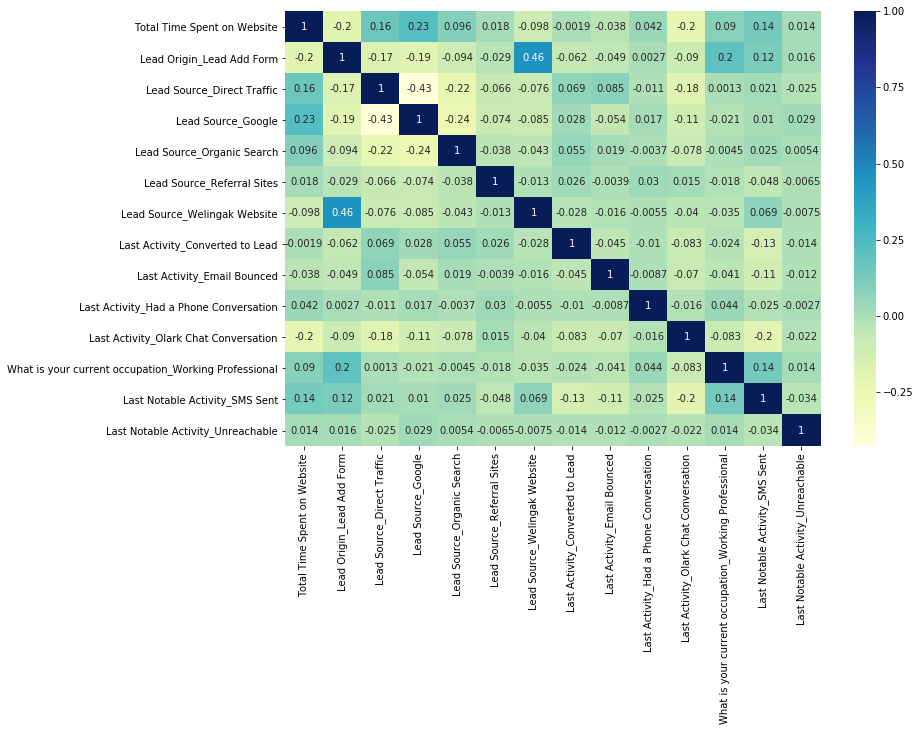

In [65]:
plt.figure(figsize = (12,8))
sns.heatmap(X_train[col].corr(),annot = True, cmap='YlGnBu')
plt.show()

### Metrics other than Accuracy in Traing Data Set:

In [66]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

##### Sensitivity:

In [67]:
TP / float(TP+FN)

0.6919662671992899

##### Specificity:

In [68]:
TN / float(TN+FP)

0.8815434430652995

##### False Postive Rate:

In [69]:
print(FP/ float(TN+FP))

0.11845655693470049


##### Positive Predictive Value:

In [70]:
print (TP / float(TP+FP))

0.7802802802802803


##### Negative Predictive Value:

In [71]:
print (TN / float(TN+ FN))

0.8247917192628125


# Step 9: Plotting ROC Curve for Training Data:

In [72]:
def roc_curve(actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Training')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [73]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Conversion'], y_train_pred_final['Conversion_Prob'], drop_intermediate = False )

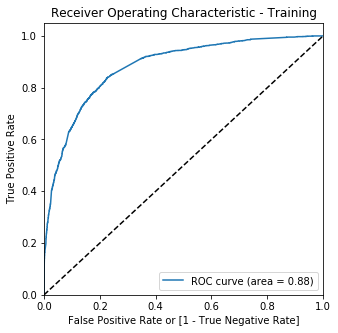

In [74]:
roc_curve(y_train_pred_final['Conversion'], y_train_pred_final['Conversion_Prob'])

#### Area Under the Curve (AUC) is 0.88, which means model is good.

# Step 10: Finding Optimal Cutoff Point

##### Creating columns with different probability cutoffs:

In [75]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,Lead_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.244526,5123,0,1,1,1,0,0,0,0,0,0,0
1,0,0.072237,6322,0,1,0,0,0,0,0,0,0,0,0
2,0,0.098727,3644,0,1,0,0,0,0,0,0,0,0,0
3,0,0.144717,3011,0,1,1,0,0,0,0,0,0,0,0
4,0,0.023779,8140,0,1,0,0,0,0,0,0,0,0,0


##### Let's calculate the Accuracy, Sensitivity and Specificity for different probability cutoffs and put them in a Dataframe:

In [76]:
df_cutoff = pd.DataFrame(columns = ['Prob','Accuracy','Sensitivity','Specificity'])

nums = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in nums:
    conf_matrix = metrics.confusion_matrix(y_train_pred_final['Conversion'], y_train_pred_final[i] )
    total = sum(sum(conf_matrix))
    accuracy = (conf_matrix[0,0]+conf_matrix[1,1])/total
    
    sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])    
    df_cutoff.loc[i] =[i , accuracy, sensitivity, specificity]
df_cutoff

,Prob,Accuracy,Sensitivity,Specificity
0.0,0.0,0.378084,1.000000,0.000000
0.1,0.1,0.592885,0.970706,0.363195
0.2,0.2,0.739218,0.920994,0.628710
0.3,0.3,0.798288,0.829117,0.779547
0.4,0.4,0.809532,0.757656,0.841069
0.5,0.5,0.809700,0.691522,0.881543
0.6,0.6,0.792750,0.574345,0.925526
0.7,0.7,0.778822,0.496671,0.950351
0.8,0.8,0.759188,0.411008,0.970858
0.9,0.9,0.713878,0.260985,0.989207


##### Plotting Accuracy, Sensitivity and Specificity for different probability:

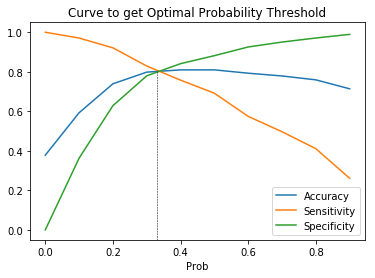

In [77]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.
df_cutoff.plot.line(x='Prob', y=['Accuracy','Sensitivity','Specificity'])
plt.axvline(x=0.33, ymax= 0.78, color= 'k', linestyle= '--', linewidth = 0.5)
plt.title("Curve to get Optimal Probability Threshold")
plt.show()

#### From the above curve , 0.33 is the optimum point to take it as a cutoff probability.

##### Creating a columns "Final_Predicted" as per the new optimum probability value of 0.33:

In [78]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Conversion_Prob'].map( lambda x: 1 if x > 0.33 else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,Lead_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.244526,5123,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.072237,6322,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.098727,3644,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.144717,3011,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.023779,8140,0,1,0,0,0,0,0,0,0,0,0,0


##### Overall Accuracy:

In [79]:
metrics.accuracy_score(y_train_pred_final['Conversion'], y_train_pred_final['Final_Predicted'])

0.8013089444537674

##### New Confusion Matrix:

In [80]:
confusion_new = metrics.confusion_matrix(y_train_pred_final['Conversion'], y_train_pred_final['Final_Predicted'])
confusion_new

array([[2949,  757],
       [ 427, 1826]], dtype=int64)

In [81]:
TP = confusion_new[1,1] # true positive 
TN = confusion_new[0,0] # true negatives
FP = confusion_new[0,1] # false positives
FN = confusion_new[1,0] # false negatives

##### Sensitivity:

In [82]:
TP / float(TP+FN)

0.8104749223257879

##### Specificity:

In [83]:
TN / float(TN+FP)

0.7957366432811657

##### False Postive Rate:

In [84]:
print(FP/ float(TN+FP))

0.20426335671883433


##### Positive Predictive Value:

In [85]:
print(TP / float(TP+FP))

0.7069299264421216


##### Negative Predictive Value:

In [86]:
print (TN / float(TN+ FN))

0.8735189573459715


### Precision and Recall:

#### Below are the formulas:

- #### Precision = TP / (TP + FP)

- #### Recall = (TP / TP + FN)

However, we can calculate them using meathods available in SKLearn library.

##### Precision:

In [87]:
from sklearn.metrics import precision_score
precision_score(y_train_pred_final['Conversion'], y_train_pred_final['Final_Predicted'])

0.7069299264421216

##### Recall:

In [88]:
from sklearn.metrics import recall_score
recall_score(y_train_pred_final['Conversion'], y_train_pred_final['Final_Predicted'])

0.8104749223257879

# Step 11: Precision and Recall Tradeoff for Traing Data:

In [89]:
from sklearn.metrics import precision_recall_curve

In [90]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Conversion'], y_train_pred_final['Conversion_Prob'])

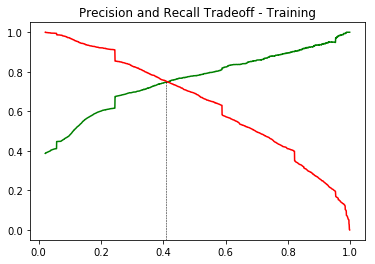

In [91]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.41, ymax= 0.73, color= 'k', linestyle= '--', linewidth = 0.5)
plt.title("Precision and Recall Tradeoff - Training")
plt.show()

As per the above graph, it is clear that at very low probability, Recall is high and Precision is low. However, at very high probability, Recall is very low and Precision is very high.

# Step 12: Making Prediction on Test Set

##### Scaling numerical colums in Test data set:

In [92]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7358,0.486244,-0.191492,1.166767,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8398,3.355082,2.528656,2.074210,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3472,1.305912,-0.584524,2.376691,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8673,0.076410,0.671351,-0.345637,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8053,0.076410,1.477524,0.561805,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


##### Taking RFE supported columns in Test data set:

In [93]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
7358,-0.191492,0,0,1,0,0,0,1,0,0,0,0,0,0
8398,2.528656,0,1,0,0,0,0,0,0,0,0,0,0,0
3472,-0.584524,0,0,1,0,0,0,0,0,0,0,0,0,0
8673,0.671351,0,1,0,0,0,0,0,0,0,0,0,0,0
8053,1.477524,0,0,1,0,0,0,0,0,0,0,0,1,0


##### Adding Constant:

In [94]:
X_test_sm = sm.add_constant(X_test)

##### Making Prediction with Model 2:

In [95]:
y_test_pred = logm_2.predict(X_test_sm)
y_test_pred[:10]

7358    0.060495
8398    0.769079
3472    0.127308
8673    0.297090
8053    0.864495
6385    0.122971
5396    0.073829
7152    0.244526
7013    0.590956
7903    0.244526
dtype: float64

##### Creating Dataframe for "y_test_pred":

In [96]:
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
7358,0.060495
8398,0.769079
3472,0.127308
8673,0.297090
8053,0.864495


##### Creating Dataframe for "y_test":

In [97]:
y_test = pd.DataFrame(y_test)

##### Assigning "Lead_ID" to index:

In [98]:
y_test['Lead_ID'] = y_test.index
y_test.head()

,Converted,Lead_ID
7358,0,7358
8398,0,8398
3472,0,3472
8673,1,8673
8053,1,8053


##### Appending "y_test " and "y_test_pred" after removing index of both dataframes:

In [99]:
y_test_pred = y_test_pred.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

y_test_pred_final = pd.concat([y_test, y_test_pred], axis=1)
y_test_pred_final.head()

,Converted,Lead_ID,0
0,0,7358,0.060495
1,0,8398,0.769079
2,0,3472,0.127308
3,1,8673,0.297090
4,1,8053,0.864495


##### Renaming the column 0 as "Conversion_Prob":

In [100]:
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_test_pred_final.head()

,Converted,Lead_ID,Conversion_Prob
0,0,7358,0.060495
1,0,8398,0.769079
2,0,3472,0.127308
3,1,8673,0.297090
4,1,8053,0.864495


##### Rearranging the columns for better look:

In [101]:
y_test_pred_final = y_test_pred_final.reindex_axis(['Lead_ID','Converted','Conversion_Prob'], axis=1)
y_test_pred_final.head()

,Lead_ID,Converted,Conversion_Prob
0,7358,0,0.060495
1,8398,0,0.769079
2,3472,0,0.127308
3,8673,1,0.297090
4,8053,1,0.864495


##### Creating a columns "Final_Predicted" as per the  optimum probability value of 0.33:

In [102]:
y_test_pred_final['Final_Predicted'] = y_test_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.33 else 0)
y_test_pred_final.head()

,Lead_ID,Converted,Conversion_Prob,Final_Predicted
0,7358,0,0.060495,0
1,8398,0,0.769079,1
2,3472,0,0.127308,0
3,8673,1,0.297090,0
4,8053,1,0.864495,1


### Metrics other than Accuracy in Test Data Set:

##### Accuracy: 

In [103]:
accuracy_score=metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final['Final_Predicted'])
print(accuracy_score)

0.8026624902114331


##### Confusion Matrix for Test data:

In [104]:
confusion_test = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['Final_Predicted'])
print(confusion_test)

[[1274  327]
 [ 177  776]]


In [105]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

##### Sensitivity:

In [106]:
TP / float(TP+FN)

0.8142707240293809

##### Specificity: 

In [107]:
TN / float(TN+FP)

0.7957526545908807

##### False Postive Rate:

In [108]:
print(FP/ float(TN+FP))

0.2042473454091193


##### Positive Predictive Value:

In [109]:
print (TP / float(TP+FP))

0.7035358114233907


##### Negative Predictive Value:

In [110]:
print (TN / float(TN+ FN))

0.8780151619572708


##### Precision:

In [111]:
precision_score(y_test_pred_final['Converted'], y_test_pred_final['Final_Predicted'])

0.7035358114233907

##### Recall:

In [112]:
recall_score(y_test_pred_final['Converted'], y_test_pred_final['Final_Predicted'])

0.8142707240293809

#### All metrics are almost same in Training and Test Data, which shows our Model is good.

# Step 13: Plotting the ROC Curve for Test Data

In [113]:
def roc_curve_test(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic - Test')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [114]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final['Converted'], y_test_pred_final['Conversion_Prob'], drop_intermediate = False )

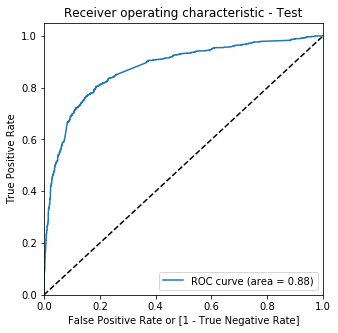

In [115]:
roc_curve_test(y_test_pred_final['Converted'], y_test_pred_final['Conversion_Prob'])

#### Area Under the Curve (AUC) is 0.88, which means model is good. It is similar to AUC score of Training data, which proves that Model is behaving correctly.

# Step 14: Precision and Recall Tradeoff for Test Data:

In [116]:
p, r, thresholds = precision_recall_curve(y_test_pred_final['Converted'], y_test_pred_final['Conversion_Prob'])

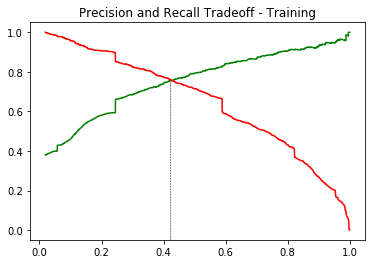

In [117]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.42, ymax= 0.73, color= 'k', linestyle= '--', linewidth = 0.5)
plt.title("Precision and Recall Tradeoff - Training")
plt.show()

As per the above graph, it is clear that at very low probability, Recall is high and Precision is low. However, at very high probability, Recall is very low and Precision is very high.

# Step 15: Lead Score Calculation:
#### Lead Score will be calculated on entire dataset. Below is the formula:

- #### Lead Score = 100 * (Conversion Probability)

##### Creating a new Dataframe for Traing Leads from the final Training Dataframe:

In [118]:
train_leads = y_train_pred_final.copy()
train_leads.head()

,Conversion,Conversion_Prob,Lead_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.244526,5123,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.072237,6322,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.098727,3644,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.144717,3011,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.023779,8140,0,1,0,0,0,0,0,0,0,0,0,0


##### Taking necessary columns 'Lead_ID','Conversion', 'Conversion_Prob' and 'Final_Predicted':

In [119]:
train_leads = train_leads[['Lead_ID','Conversion','Conversion_Prob','Final_Predicted']]
train_leads = train_leads.rename(columns={'Conversion' : 'Converted'})
train_leads.head()

,Lead_ID,Converted,Conversion_Prob,Final_Predicted
0,5123,0,0.244526,0
1,6322,0,0.072237,0
2,3644,0,0.098727,0
3,3011,0,0.144717,0
4,8140,0,0.023779,0


##### Creating a new Dataframe for Test Leads from the final Test Dataframe:

In [120]:
test_leads = y_test_pred_final.copy()
test_leads.head()

,Lead_ID,Converted,Conversion_Prob,Final_Predicted
0,7358,0,0.060495,0
1,8398,0,0.769079,1
2,3472,0,0.127308,0
3,8673,1,0.297090,0
4,8053,1,0.864495,1


##### Creating a new Dataframe "complete_leads" by appending Training and Test datasets to make combined Dataframe:

In [121]:
complete_leads = train_leads.append(test_leads)
complete_leads.head()

,Lead_ID,Converted,Conversion_Prob,Final_Predicted
0,5123,0,0.244526,0
1,6322,0,0.072237,0
2,3644,0,0.098727,0
3,3011,0,0.144717,0
4,8140,0,0.023779,0


##### Creating a new column "Lead_Score":

In [122]:
complete_leads['Lead_Score'] = complete_leads['Conversion_Prob'] * 100
complete_leads['Lead_Score'] = round(complete_leads['Lead_Score'], 0)
complete_leads.head()

,Lead_ID,Converted,Conversion_Prob,Final_Predicted,Lead_Score
0,5123,0,0.244526,0,24.0
1,6322,0,0.072237,0,7.0
2,3644,0,0.098727,0,10.0
3,3011,0,0.144717,0,14.0
4,8140,0,0.023779,0,2.0


##### Setting the column "Lead_ID" as index. Doing this for concatenating "Lead Number" column at the first position. It will later be changed from index to the column:

In [123]:
complete_leads = complete_leads.set_index('Lead_ID').sort_index(axis = 0, ascending = True)
complete_leads.head()

,Converted,Conversion_Prob,Final_Predicted,Lead_Score
Lead_ID,,,,
0,0,0.244526,0,24.0
1,0,0.266255,0,27.0
2,1,0.631987,1,63.0
3,0,0.124306,0,12.0
4,1,0.355913,1,36.0


##### Taking the columns "Lead Number" from the original Dataframe and create a new Dataframe "lead_number":

In [124]:
lead_number = leads_data[['Lead Number']]

##### Concatenating Dataframes "lead_number" and "complete_leads":

In [125]:
complete_leads = pd.concat([lead_number, complete_leads], axis=1)
complete_leads.head()

,Lead Number,Converted,Conversion_Prob,Final_Predicted,Lead_Score
Lead_ID,,,,,
0,660737,0,0.244526,0,24.0
1,660728,0,0.266255,0,27.0
2,660727,1,0.631987,1,63.0
3,660719,0,0.124306,0,12.0
4,660681,1,0.355913,1,36.0


##### Resetting the ndex to move "Lead_ID" from index to column:

In [126]:
complete_leads = complete_leads.reset_index()
complete_leads.head()

,Lead_ID,Lead Number,Converted,Conversion_Prob,Final_Predicted,Lead_Score
0,0,660737,0,0.244526,0,24.0
1,1,660728,0,0.266255,0,27.0
2,2,660727,1,0.631987,1,63.0
3,3,660719,0,0.124306,0,12.0
4,4,660681,1,0.355913,1,36.0


##### Changing the Datatype of the column "Lead_Score" from 'float' to 'int':

In [127]:
complete_leads['Lead_Score'] = complete_leads['Lead_Score'].astype('int64')
complete_leads.head()

,Lead_ID,Lead Number,Converted,Conversion_Prob,Final_Predicted,Lead_Score
0,0,660737,0,0.244526,0,24
1,1,660728,0,0.266255,0,27
2,2,660727,1,0.631987,1,63
3,3,660719,0,0.124306,0,12
4,4,660681,1,0.355913,1,36


## Step 16: Analysis of Feature Coefficients:

##### Creating a new Dataframe with parameters of Model 2 and sorting in descending order:

In [128]:
feature_coef = logm_2.params[1:]
feature_coef_df = pd.DataFrame(feature_coef).reset_index()
feature_coef_df = feature_coef_df.rename(columns={'index':'Features', 0:'Coefficients'})
feature_coef_df = round(feature_coef_df.sort_values(by='Coefficients', ascending=False), 2)
feature_coef_df

,Features,Coefficients
11,What is your current occupation_Working Profes...,2.87
1,Lead Origin_Lead Add Form,2.65
6,Lead Source_Welingak Website,2.61
9,Last Activity_Had a Phone Conversation,2.42
13,Last Notable Activity_Unreachable,1.62
12,Last Notable Activity_SMS Sent,1.49
0,Total Time Spent on Website,1.11
3,Lead Source_Google,-1.11
7,Last Activity_Converted to Lead,-1.25
4,Lead Source_Organic Search,-1.26


##### Plotting Bar Plot between Feature and Coefficients:

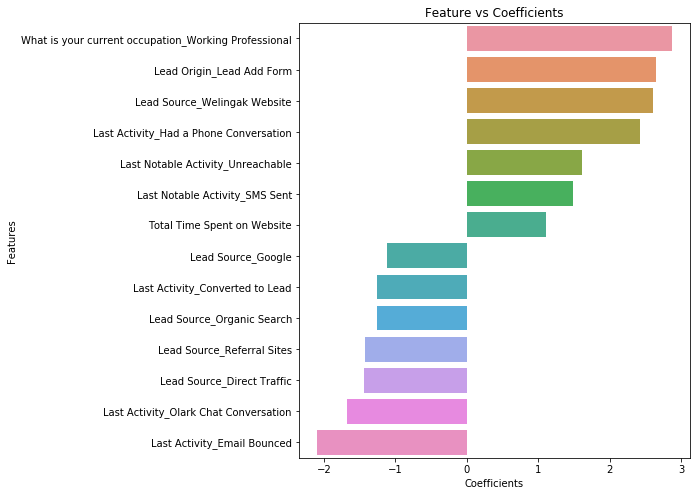

In [129]:
plt.figure(figsize=(7,8))
sns.barplot(y='Features', x='Coefficients', data=feature_coef_df)
plt.title("Feature vs Coefficients")
plt.show()

# Conclusion:

As per the analysis, below are the features which help a lot to get successful Lead conversion:
- #### Features with Positive Coefficient
    - What is your current occupation_Working Professional
    - Lead Origin_Lead Add Form
    - Lead Source_Welingak Website
    - Last Activity_Had a Phone Conversation
    - Last Notable Activity_Unreachable
    - Last Notable Activity_SMS Sent
    - Total Time Spent on Website
- #### Features with Negative Coefficient
    - Lead Source_Google
    - Last Activity_Converted to Lead
    - Lead Source_Organic Search
    - Lead Source_Referral Sites
    - Lead Source_Direct Traffic
    - Last Activity_Olark Chat Conversation
    - Last Activity_Email Bounced
    
#### It means, below are the main 2 conclusion points:
-  The conversion probability increses with increase in value of the features with positive coefficient.
-  The conversion probability increses with decrease in value of the features with negative coefficient.   